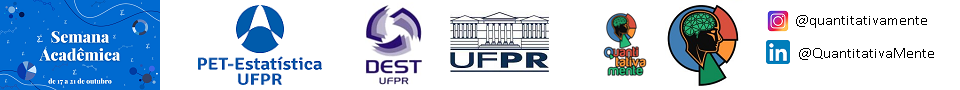

# **Semana acadêmica do curso de Estatística 2022**

## **Preparando o ambiente para utilizar o PySpark**

### **Instalando o Java**

O Apache Spark depende de outros sistemas, portanto, antes do Spark é preciso instalar as dependências. Primeiro, deve-se instalar o java

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

### **Instalando o Apache Spark**

Em seguida, é preciso fazer o download do Spark, e, também, do hadoop, pois o Apache Spark roda sob o HDFS, em sua máquina (no caso aqui, na máquina virtual do Google Colab que você está usando.

In [ ]:
# Fazendo download
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Descompactando os arquivos
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

### **Configurando o ambiente**

Pronto! Agora precisamos dizer para o sistema onde encontrar o Java e o Spark, que instalamos a pouco neste ambiente.

In [ ]:
# Importando a biblioteca os
import os

# Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

A seguir, vamos precisar da biblioteca findspark que vai nos permitir importar pacotes necessários para o funcionamento do pyspark



In [ ]:
# instalando a findspark
!pip install -q findspark

In [ ]:
#importando a findspark
import findspark

# iniciando o findspark
findspark.init()

## **O problema de negócio**

Entregar publicidade corretamente pode reduzir custos no sentido de não gastar com propaganda para um clinte que já consumiria seu produto/serviço sem a necessidade de consumir a peça publicitáriam. Também pode reduzir churn de clientes que devido algum gatilho de forma errada pela publicidade deixe de consumir o serviço.

É de extrema importância que os cientistas de dados 👨🏽‍💻 conheçam a teoria e os conceitos, e os diversos modelos passíveis de utilização para tarefas de classificação e regressão, bem como conhecer os diversos frameworks e linguagens para realização de aprendizado estatístico .

Nesta aula vamos utilizar um conjunto de dados disponibilizado pela Gamers Club sobre o jogo CS GO. Ajustaremos modelos de machine learning para a tarefa de classificação, com o objetivo de prever se determinado usuário deste Game vai acessar a plataforma e iniciar ao menos uma sessão do jogo na semana seguinte à análise.

Link para o repositório do kaggle https://www.kaggle.com/datasets/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club

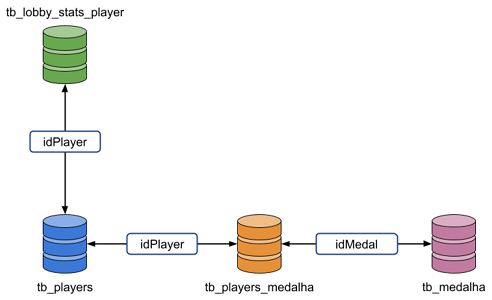

## **Iniciando o PySpark**

Tudo certo até aqui? Ótimo, então agora vamos abrir um sessão Spark para poder trabalhar com este FrameWork.

In [ ]:
# importando as bibliotecas necessárias
from pyspark import *
from pyspark.sql import *
from pyspark.sql import SparkSession


In [ ]:
# iniciando o spark context
sc = SparkSession.builder.master('local[*]').getOrCreate()

# Verificando se a sessão foi criada
sc

## **ETL tabela jogos**

### **Ingestão dos dados para o Apache Spark**

In [ ]:
# Permitir o Google Colab utilizar arquivos do Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
 # Carregando um conjunto de dados
jogos = sc.read\
        .format('csv')\
        .option('inferSchema',True)\
        .option('delimiter',',')\
        .option('header',True)\
        .option('encoding','UTF-8')\
        .load('/content/drive/MyDrive/Quantitativamente/Semana_estatistica_UFPR/tb_lobby_stats_player.csv')

In [ ]:
# Verificando o tipo de objeto criado
type(jogos)

pyspark.sql.dataframe.DataFrame

In [ ]:
# Espiando o dataset
jogos.show()

+-----------+--------+------+------+--------+-------+----+-------------+------------+----+----------+-------+-------+-------+-------+-------+----------+-----------+--------+------+-------+-----------+-----------+--------------+-----------+-------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-------------------+
|idLobbyGame|idPlayer|idRoom|qtKill|qtAssist|qtDeath|qtHs|qtBombeDefuse|qtBombePlant|qtTk|qtTkAssist|qt1Kill|qt2Kill|qt3Kill|qt4Kill|qt5Kill|qtPlusKill|qtFirstKill|vlDamage|qtHits|qtShots|qtLastAlive|qtClutchWon|qtRoundsPlayed|descMapName|vlLevel|qtSurvived|qtTrade|qtFlashAssist|qtHitHeadshot|qtHitChest|qtHitStomach|qtHitLeftAtm|qtHitRightArm|qtHitLeftLeg|qtHitRightLeg|flWinner|        dtCreatedAt|
+-----------+--------+------+------+--------+-------+----+-------------+------------+----+----------+-------+-------+-------+-------+-------+----------+-----------+--------+------+-------+--------

In [ ]:
# Verificando o Schema
jogos.printSchema()

root
 |-- idLobbyGame: integer (nullable = true)
 |-- idPlayer: integer (nullable = true)
 |-- idRoom: integer (nullable = true)
 |-- qtKill: integer (nullable = true)
 |-- qtAssist: integer (nullable = true)
 |-- qtDeath: integer (nullable = true)
 |-- qtHs: integer (nullable = true)
 |-- qtBombeDefuse: integer (nullable = true)
 |-- qtBombePlant: integer (nullable = true)
 |-- qtTk: double (nullable = true)
 |-- qtTkAssist: double (nullable = true)
 |-- qt1Kill: integer (nullable = true)
 |-- qt2Kill: integer (nullable = true)
 |-- qt3Kill: integer (nullable = true)
 |-- qt4Kill: integer (nullable = true)
 |-- qt5Kill: integer (nullable = true)
 |-- qtPlusKill: integer (nullable = true)
 |-- qtFirstKill: integer (nullable = true)
 |-- vlDamage: integer (nullable = true)
 |-- qtHits: double (nullable = true)
 |-- qtShots: integer (nullable = true)
 |-- qtLastAlive: double (nullable = true)
 |-- qtClutchWon: integer (nullable = true)
 |-- qtRoundsPlayed: integer (nullable = true)
 |-- 

In [ ]:
# Contando o número de linhas do dataset
jogos.count()

184152

In [ ]:
# Listando as colunas do dataset
jogos.columns

['idLobbyGame',
 'idPlayer',
 'idRoom',
 'qtKill',
 'qtAssist',
 'qtDeath',
 'qtHs',
 'qtBombeDefuse',
 'qtBombePlant',
 'qtTk',
 'qtTkAssist',
 'qt1Kill',
 'qt2Kill',
 'qt3Kill',
 'qt4Kill',
 'qt5Kill',
 'qtPlusKill',
 'qtFirstKill',
 'vlDamage',
 'qtHits',
 'qtShots',
 'qtLastAlive',
 'qtClutchWon',
 'qtRoundsPlayed',
 'descMapName',
 'vlLevel',
 'qtSurvived',
 'qtTrade',
 'qtFlashAssist',
 'qtHitHeadshot',
 'qtHitChest',
 'qtHitStomach',
 'qtHitLeftAtm',
 'qtHitRightArm',
 'qtHitLeftLeg',
 'qtHitRightLeg',
 'flWinner',
 'dtCreatedAt']

In [ ]:
# Contando o número de colunas do dataset
len(jogos.columns)

38

In [ ]:
# Método para verificar o tipo dos atributos do dataset
jogos.dtypes

[('idLobbyGame', 'int'),
 ('idPlayer', 'int'),
 ('idRoom', 'int'),
 ('qtKill', 'int'),
 ('qtAssist', 'int'),
 ('qtDeath', 'int'),
 ('qtHs', 'int'),
 ('qtBombeDefuse', 'int'),
 ('qtBombePlant', 'int'),
 ('qtTk', 'double'),
 ('qtTkAssist', 'double'),
 ('qt1Kill', 'int'),
 ('qt2Kill', 'int'),
 ('qt3Kill', 'int'),
 ('qt4Kill', 'int'),
 ('qt5Kill', 'int'),
 ('qtPlusKill', 'int'),
 ('qtFirstKill', 'int'),
 ('vlDamage', 'int'),
 ('qtHits', 'double'),
 ('qtShots', 'int'),
 ('qtLastAlive', 'double'),
 ('qtClutchWon', 'int'),
 ('qtRoundsPlayed', 'int'),
 ('descMapName', 'string'),
 ('vlLevel', 'int'),
 ('qtSurvived', 'double'),
 ('qtTrade', 'double'),
 ('qtFlashAssist', 'double'),
 ('qtHitHeadshot', 'double'),
 ('qtHitChest', 'double'),
 ('qtHitStomach', 'double'),
 ('qtHitLeftAtm', 'double'),
 ('qtHitRightArm', 'double'),
 ('qtHitLeftLeg', 'double'),
 ('qtHitRightLeg', 'double'),
 ('flWinner', 'int'),
 ('dtCreatedAt', 'string')]

### **Transformações**

In [ ]:
# importando os métodos com funções para transformações de variáveis
from pyspark.sql.functions import *

In [ ]:
# Selecionando somente algumas colunas do dataset
jogos.select('idPlayer','dtCreatedAt').show(3)

+--------+-------------------+
|idPlayer|        dtCreatedAt|
+--------+-------------------+
|       1|2022-01-21 19:45:44|
|       1|2022-02-04 02:09:47|
|       2|2021-09-18 18:07:43|
+--------+-------------------+
only showing top 3 rows



In [ ]:
# Alterando a variavel para o formato date
jogos = jogos.withColumn(colName = 'dtCreatedAt', col = to_date(col = 'dtCreatedAt'))

# Inspecionando o resultado
jogos.select('dtCreatedAt').printSchema()
jogos.select('dtCreatedAt').show(3)

root
 |-- dtCreatedAt: date (nullable = true)

+-----------+
|dtCreatedAt|
+-----------+
| 2022-01-21|
| 2022-02-04|
| 2021-09-18|
+-----------+
only showing top 3 rows



## **ETL tabela jogador**

### **Ingestão dos dados para o Apache Spark**

In [ ]:
 # Carregando um conjunto de dados
jogador = sc.read\
        .format('csv')\
        .option('inferSchema',True)\
        .option('delimiter',',')\
        .option('header',True)\
        .option('encoding','UTF-8')\
        .load('/content/drive/MyDrive/Quantitativamente/Semana_estatistica_UFPR/tb_players.csv')

In [ ]:
# Verificando o tipo de objeto criado
type(jogador)

pyspark.sql.dataframe.DataFrame

In [ ]:
# Espiando o dataset
jogador.show()

+--------+----------+---------+--------+-----------+-------------------+-------------------+
|idPlayer|flFacebook|flTwitter|flTwitch|descCountry|            dtBirth|     dtRegistration|
+--------+----------+---------+--------+-----------+-------------------+-------------------+
|       1|         0|        0|       0|         cl|               null|2021-03-19 21:31:39|
|       2|         0|        0|       0|         br|               null|2020-05-06 19:28:29|
|       3|         0|        0|       0|         br|               null|2020-01-28 13:00:38|
|       4|         0|        0|       0|         br|               null|2017-05-31 16:13:51|
|       5|         0|        0|       0|         ar|               null|2021-02-08 11:57:21|
|       6|         0|        0|       0|         br|2002-03-23 00:00:00|2019-01-09 19:24:27|
|       7|         0|        0|       0|         br|               null|2020-04-24 22:53:50|
|       8|         0|        0|       0|         br|               nul

In [ ]:
# Verificando o Schema
jogador.printSchema()

root
 |-- idPlayer: integer (nullable = true)
 |-- flFacebook: integer (nullable = true)
 |-- flTwitter: integer (nullable = true)
 |-- flTwitch: integer (nullable = true)
 |-- descCountry: string (nullable = true)
 |-- dtBirth: string (nullable = true)
 |-- dtRegistration: string (nullable = true)



In [ ]:
# Contando o número de linhas do dataset
jogador.count()

2716

### **Transformações**

In [ ]:
# importando os métodos com funções para transformações de variáveis
from pyspark.sql.functions import *

In [ ]:
# Selecionando somente algumas colunas do dataset
jogador.select('idPlayer','dtRegistration').show(3)

+--------+-------------------+
|idPlayer|     dtRegistration|
+--------+-------------------+
|       1|2021-03-19 21:31:39|
|       2|2020-05-06 19:28:29|
|       3|2020-01-28 13:00:38|
+--------+-------------------+
only showing top 3 rows



In [ ]:
# Criando data de corte de análise
jogador = jogador.withColumn(colName = 'dtCalc', col = lit('2022-01-03'))

# Inspecionando o resultado
jogador.printSchema()
jogador.show(3)

root
 |-- idPlayer: integer (nullable = true)
 |-- flFacebook: integer (nullable = true)
 |-- flTwitter: integer (nullable = true)
 |-- flTwitch: integer (nullable = true)
 |-- descCountry: string (nullable = true)
 |-- dtBirth: string (nullable = true)
 |-- dtRegistration: string (nullable = true)
 |-- dtCalc: string (nullable = false)

+--------+----------+---------+--------+-----------+-------+-------------------+----------+
|idPlayer|flFacebook|flTwitter|flTwitch|descCountry|dtBirth|     dtRegistration|    dtCalc|
+--------+----------+---------+--------+-----------+-------+-------------------+----------+
|       1|         0|        0|       0|         cl|   null|2021-03-19 21:31:39|2022-01-03|
|       2|         0|        0|       0|         br|   null|2020-05-06 19:28:29|2022-01-03|
|       3|         0|        0|       0|         br|   null|2020-01-28 13:00:38|2022-01-03|
+--------+----------+---------+--------+-----------+-------+-------------------+----------+
only showing top

In [ ]:
# Alterando as variaveis de data para o formato date
jogador = jogador.withColumn(colName = 'dtRegistration', col = to_date(col = 'dtRegistration'))
jogador = jogador.withColumn(colName = 'dtCalc', col = to_date(col = 'dtCalc'))

# Inspecionando o resultado
jogador.printSchema()
jogador.show(3)

root
 |-- idPlayer: integer (nullable = true)
 |-- flFacebook: integer (nullable = true)
 |-- flTwitter: integer (nullable = true)
 |-- flTwitch: integer (nullable = true)
 |-- descCountry: string (nullable = true)
 |-- dtBirth: string (nullable = true)
 |-- dtRegistration: date (nullable = true)
 |-- dtCalc: date (nullable = true)

+--------+----------+---------+--------+-----------+-------+--------------+----------+
|idPlayer|flFacebook|flTwitter|flTwitch|descCountry|dtBirth|dtRegistration|    dtCalc|
+--------+----------+---------+--------+-----------+-------+--------------+----------+
|       1|         0|        0|       0|         cl|   null|    2021-03-19|2022-01-03|
|       2|         0|        0|       0|         br|   null|    2020-05-06|2022-01-03|
|       3|         0|        0|       0|         br|   null|    2020-01-28|2022-01-03|
+--------+----------+---------+--------+-----------+-------+--------------+----------+
only showing top 3 rows



In [ ]:
# Calculando o tempo de registro (em dias) na plataforma
jogador = jogador.withColumn(colName = 'timeRegistration', col = datediff('dtCalc','dtRegistration'))

# Inspecionando o resultado
jogador.printSchema()
jogador.show(3)

root
 |-- idPlayer: integer (nullable = true)
 |-- flFacebook: integer (nullable = true)
 |-- flTwitter: integer (nullable = true)
 |-- flTwitch: integer (nullable = true)
 |-- descCountry: string (nullable = true)
 |-- dtBirth: string (nullable = true)
 |-- dtRegistration: date (nullable = true)
 |-- dtCalc: date (nullable = true)
 |-- timeRegistration: integer (nullable = true)

+--------+----------+---------+--------+-----------+-------+--------------+----------+----------------+
|idPlayer|flFacebook|flTwitter|flTwitch|descCountry|dtBirth|dtRegistration|    dtCalc|timeRegistration|
+--------+----------+---------+--------+-----------+-------+--------------+----------+----------------+
|       1|         0|        0|       0|         cl|   null|    2021-03-19|2022-01-03|             290|
|       2|         0|        0|       0|         br|   null|    2020-05-06|2022-01-03|             607|
|       3|         0|        0|       0|         br|   null|    2020-01-28|2022-01-03|          

In [ ]:
# Apagando Colunas do SparkDataFrame
jogador = jogador.drop('dtBirth','dtRegistration','dtCalc')

# Inspecionando o resultado
jogador.printSchema()
jogador.show(3)

root
 |-- idPlayer: integer (nullable = true)
 |-- flFacebook: integer (nullable = true)
 |-- flTwitter: integer (nullable = true)
 |-- flTwitch: integer (nullable = true)
 |-- descCountry: string (nullable = true)
 |-- timeRegistration: integer (nullable = true)

+--------+----------+---------+--------+-----------+----------------+
|idPlayer|flFacebook|flTwitter|flTwitch|descCountry|timeRegistration|
+--------+----------+---------+--------+-----------+----------------+
|       1|         0|        0|       0|         cl|             290|
|       2|         0|        0|       0|         br|             607|
|       3|         0|        0|       0|         br|             706|
+--------+----------+---------+--------+-----------+----------------+
only showing top 3 rows



## **Feature Engineering**

In [ ]:
# Criando o df com as covariáveis das estatísticas dos jogos
covariaveis = jogos.filter(
    (col('dtCreatedAt') < '2022-01-04') & 
    (col('dtCreatedAt') > '2021-11-30')
    )\
    .groupby('idPlayer')\
    .agg(
        sum('qtKill').alias('qtKill'), # Number of kills
        sum('qtAssist').alias('qtAssist'), # Number of assists
        sum('qtDeath').alias('qtDeath'), # Number of death
        sum('qtHs').alias('qtHs'), # Number of kills by head shot
        sum('qtBombeDefuse').alias('qtBombeDefuse'), # Number of bomb defuses
        sum('qtBombePlant').alias('qtBombePlant'), # Number of bomb plants
        sum('qtFirstKill').alias('qtFirstKill'), # Number of rounds with first kill
        sum('vlDamage').alias('vlDamage'), # Total match damage
        sum('qtHits').alias('qtHits'), # Total match hits
        sum('qtLastAlive').alias('qtLastAlive'), # Number of rounds being last alive
        sum('qtClutchWon').alias('qtClutchWon'), # Total clutchs wons
        sum('qtRoundsPlayed').alias('qtRoundsPlayed'), # Total rounds played 
        sum('qtSurvived').alias('qtSurvived'), # Number of rounds survived  
        sum('qtTrade').alias('qtTrade'), # Number of trade kills
        sum('qtFlashAssist').alias('qtFlashAssist'), # Number of flash assists
        sum('qtHitHeadshot').alias('qtHitHeadshot'), # Total headshots hits
        sum('qtHitChest').alias('qtHitChest'), # Total chest hits
        sum('qtHitStomach').alias('qtHitStomach'), # Total stomach hits
        sum('qtHitLeftAtm').alias('qtHitLeftAtm'), # Total left arm hits
        sum('qtHitRightArm').alias('qtHitRightArm'), # Total right arm hits 
        sum('qtHitLeftLeg').alias('qtHitLeftLeg'), # Total left leg 
        sum('qtHitRightLeg').alias('qtHitRightLeg'), # Total right leg
        sum('flWinner').alias('flWinner'), # Match winner flag (1 or 0) 
        countDistinct('idLobbyGame').alias('idLobbyGame'), # Total Match
        max('dtCreatedAt').alias('last_matches') # date last matches   
    )

# Espiando o resultado
covariaveis.show(10)

+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+------------+
|idPlayer|qtKill|qtAssist|qtDeath|qtHs|qtBombeDefuse|qtBombePlant|qtFirstKill|vlDamage|qtHits|qtLastAlive|qtClutchWon|qtRoundsPlayed|qtSurvived|qtTrade|qtFlashAssist|qtHitHeadshot|qtHitChest|qtHitStomach|qtHitLeftAtm|qtHitRightArm|qtHitLeftLeg|qtHitRightLeg|flWinner|idLobbyGame|last_matches|
+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+------------+
|    1591|  1418|     281|   1316| 481|           11|          69|        232|  185817|5198.0|       43.0|         21|   

In [ ]:
# Espiando os atributos
covariaveis.printSchema()

root
 |-- idPlayer: integer (nullable = true)
 |-- qtKill: long (nullable = true)
 |-- qtAssist: long (nullable = true)
 |-- qtDeath: long (nullable = true)
 |-- qtHs: long (nullable = true)
 |-- qtBombeDefuse: long (nullable = true)
 |-- qtBombePlant: long (nullable = true)
 |-- qtFirstKill: long (nullable = true)
 |-- vlDamage: long (nullable = true)
 |-- qtHits: double (nullable = true)
 |-- qtLastAlive: double (nullable = true)
 |-- qtClutchWon: long (nullable = true)
 |-- qtRoundsPlayed: long (nullable = true)
 |-- qtSurvived: double (nullable = true)
 |-- qtTrade: double (nullable = true)
 |-- qtFlashAssist: double (nullable = true)
 |-- qtHitHeadshot: double (nullable = true)
 |-- qtHitChest: double (nullable = true)
 |-- qtHitStomach: double (nullable = true)
 |-- qtHitLeftAtm: double (nullable = true)
 |-- qtHitRightArm: double (nullable = true)
 |-- qtHitLeftLeg: double (nullable = true)
 |-- qtHitRightLeg: double (nullable = true)
 |-- flWinner: long (nullable = true)
 |-- i

In [ ]:
# Criando data de corte de análise
covariaveis = covariaveis\
              .withColumn(colName = 'dtCalc', col = lit('2022-01-04'))

# Alterando as variaveis de data para o formato date
covariaveis = covariaveis\
              .withColumn(colName = 'dtCalc', col = to_date(col = 'dtCalc'))

# Calculando tempo (em dias) sem jogar
covariaveis = covariaveis\
              .withColumn(
                  colName = 'timeOffOfGame', 
                  col = datediff('dtCalc','last_matches')
              )

# Inspecionando o resultado
covariaveis.show(3)

+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+------------+----------+-------------+
|idPlayer|qtKill|qtAssist|qtDeath|qtHs|qtBombeDefuse|qtBombePlant|qtFirstKill|vlDamage|qtHits|qtLastAlive|qtClutchWon|qtRoundsPlayed|qtSurvived|qtTrade|qtFlashAssist|qtHitHeadshot|qtHitChest|qtHitStomach|qtHitLeftAtm|qtHitRightArm|qtHitLeftLeg|qtHitRightLeg|flWinner|idLobbyGame|last_matches|    dtCalc|timeOffOfGame|
+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+------------+----------+-------------+
|    1591|  1418|     281|   1316| 481|       

In [ ]:
# Apagando atributos desnecessários do SparkDataFrame
covariaveis = covariaveis.drop('last_matches','dtCalc')

# Inspecionando o resultado
covariaveis.printSchema()
covariaveis.show(3)

root
 |-- idPlayer: integer (nullable = true)
 |-- qtKill: long (nullable = true)
 |-- qtAssist: long (nullable = true)
 |-- qtDeath: long (nullable = true)
 |-- qtHs: long (nullable = true)
 |-- qtBombeDefuse: long (nullable = true)
 |-- qtBombePlant: long (nullable = true)
 |-- qtFirstKill: long (nullable = true)
 |-- vlDamage: long (nullable = true)
 |-- qtHits: double (nullable = true)
 |-- qtLastAlive: double (nullable = true)
 |-- qtClutchWon: long (nullable = true)
 |-- qtRoundsPlayed: long (nullable = true)
 |-- qtSurvived: double (nullable = true)
 |-- qtTrade: double (nullable = true)
 |-- qtFlashAssist: double (nullable = true)
 |-- qtHitHeadshot: double (nullable = true)
 |-- qtHitChest: double (nullable = true)
 |-- qtHitStomach: double (nullable = true)
 |-- qtHitLeftAtm: double (nullable = true)
 |-- qtHitRightArm: double (nullable = true)
 |-- qtHitLeftLeg: double (nullable = true)
 |-- qtHitRightLeg: double (nullable = true)
 |-- flWinner: long (nullable = true)
 |-- i

In [ ]:
# Contando o número de linhas do dataset
covariaveis.count()

1486

In [ ]:
# Listando as colunas do dataset
len(covariaveis.columns)

26

In [ ]:
# Trazendo informações do perfil
covariaveis = covariaveis\
              .join(jogador, how='left', on='idPlayer')

In [ ]:
# Inspecionando o resultado
covariaveis.printSchema()
covariaveis.show(3)


root
 |-- idPlayer: integer (nullable = true)
 |-- qtKill: long (nullable = true)
 |-- qtAssist: long (nullable = true)
 |-- qtDeath: long (nullable = true)
 |-- qtHs: long (nullable = true)
 |-- qtBombeDefuse: long (nullable = true)
 |-- qtBombePlant: long (nullable = true)
 |-- qtFirstKill: long (nullable = true)
 |-- vlDamage: long (nullable = true)
 |-- qtHits: double (nullable = true)
 |-- qtLastAlive: double (nullable = true)
 |-- qtClutchWon: long (nullable = true)
 |-- qtRoundsPlayed: long (nullable = true)
 |-- qtSurvived: double (nullable = true)
 |-- qtTrade: double (nullable = true)
 |-- qtFlashAssist: double (nullable = true)
 |-- qtHitHeadshot: double (nullable = true)
 |-- qtHitChest: double (nullable = true)
 |-- qtHitStomach: double (nullable = true)
 |-- qtHitLeftAtm: double (nullable = true)
 |-- qtHitRightArm: double (nullable = true)
 |-- qtHitLeftLeg: double (nullable = true)
 |-- qtHitRightLeg: double (nullable = true)
 |-- flWinner: long (nullable = true)
 |-- i

In [ ]:
# Verificando quem abriu sessão na semana seguinte a data de análise
resposta = jogos.filter(
    (col('dtCreatedAt') < '2022-01-11') & 
    (col('dtCreatedAt') >= '2022-01-04')
    )\
    .select('idPlayer')\
    .dropDuplicates()
    
# Espiando o resultado
resposta.show(10)

+--------+
|idPlayer|
+--------+
|    1591|
|    2122|
|     496|
|    1238|
|    1088|
|    1959|
|    2142|
|    2563|
|    1483|
|     737|
+--------+
only showing top 10 rows



In [ ]:
# Criando coluna indicadora de que estes idPlayer abriu sessao
resposta = resposta.withColumn(colName = 'target', col = lit(1))

# Espiando o resultado
resposta.show(10)

+--------+------+
|idPlayer|target|
+--------+------+
|    1591|     1|
|    2122|     1|
|     496|     1|
|    1238|     1|
|    1088|     1|
|    1959|     1|
|    2142|     1|
|    2563|     1|
|    1483|     1|
|     737|     1|
+--------+------+
only showing top 10 rows



In [ ]:
# Criando o df para modelagem
df_modelagem = covariaveis\
              .join(resposta, how='left', on='idPlayer')

# Espiando o resultado
df_modelagem.show(10)

+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-------------+----------+---------+--------+-----------+----------------+------+
|idPlayer|qtKill|qtAssist|qtDeath|qtHs|qtBombeDefuse|qtBombePlant|qtFirstKill|vlDamage|qtHits|qtLastAlive|qtClutchWon|qtRoundsPlayed|qtSurvived|qtTrade|qtFlashAssist|qtHitHeadshot|qtHitChest|qtHitStomach|qtHitLeftAtm|qtHitRightArm|qtHitLeftLeg|qtHitRightLeg|flWinner|idLobbyGame|timeOffOfGame|flFacebook|flTwitter|flTwitch|descCountry|timeRegistration|target|
+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-

In [ ]:
# Preenchendo os null da variável target com zero
df_modelagem = df_modelagem.fillna({'target':'0'})

# Espiando o resultado
df_modelagem.show(10)

+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-------------+----------+---------+--------+-----------+----------------+------+
|idPlayer|qtKill|qtAssist|qtDeath|qtHs|qtBombeDefuse|qtBombePlant|qtFirstKill|vlDamage|qtHits|qtLastAlive|qtClutchWon|qtRoundsPlayed|qtSurvived|qtTrade|qtFlashAssist|qtHitHeadshot|qtHitChest|qtHitStomach|qtHitLeftAtm|qtHitRightArm|qtHitLeftLeg|qtHitRightLeg|flWinner|idLobbyGame|timeOffOfGame|flFacebook|flTwitter|flTwitch|descCountry|timeRegistration|target|
+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-

In [ ]:
# Verificando se tem Null
df_modelagem.select([count(when(col(c).isNull() , c)).alias(c) for c in df_modelagem.columns]
   ).show()

+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-------------+----------+---------+--------+-----------+----------------+------+
|idPlayer|qtKill|qtAssist|qtDeath|qtHs|qtBombeDefuse|qtBombePlant|qtFirstKill|vlDamage|qtHits|qtLastAlive|qtClutchWon|qtRoundsPlayed|qtSurvived|qtTrade|qtFlashAssist|qtHitHeadshot|qtHitChest|qtHitStomach|qtHitLeftAtm|qtHitRightArm|qtHitLeftLeg|qtHitRightLeg|flWinner|idLobbyGame|timeOffOfGame|flFacebook|flTwitter|flTwitch|descCountry|timeRegistration|target|
+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-

## **EDA - Análise Exploratória de Dados**


In [ ]:
# Importando os métodos com funções para transformações de variáveis
from pyspark.sql.functions import *

In [ ]:
# Descritiva rapida dos atributos
df_modelagem.describe().show()

+-------+------------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+-------------------+-----------+------------------+-------------------+
|summary|          idPlayer|           qtKill|          qtAssist|          qtDeath|              qtHs|    qtBombeDefuse|     qtBombePlant|      qtFirstKill|          vlDamage|            qtHits|       qtLastAlive|       qtClutchWon|   qtRoundsPlayed|        qtSurvived|          qtTrade|     qtFlashAssist|     qtHitHeadshot|       qtHitChest|     qtHitStomach|     qtHitLeftAtm|     qtHitRight

### **Distribuição da variável target**

In [ ]:
df_modelagem.groupby('target').count().show()

+------+-----+
|target|count|
+------+-----+
|     1|  913|
|     0|  573|
+------+-----+



### **descCountry**

In [ ]:
df_modelagem.groupby('descCountry').count().show()

+-----------+-----+
|descCountry|count|
+-----------+-----+
|         us|    8|
|         cl|   36|
|         br| 1204|
|         uy|    9|
|         pe|    3|
|         py|    2|
|         ar|  222|
|         bo|    1|
|         ca|    1|
+-----------+-----+



In [ ]:
df_modelagem.crosstab('descCountry', 'target').show()

+------------------+---+---+
|descCountry_target|  0|  1|
+------------------+---+---+
|                ar| 95|127|
|                br|454|750|
|                us|  4|  4|
|                ca|  0|  1|
|                pe|  3|  0|
|                py|  0|  2|
|                uy|  2|  7|
|                bo|  1|  0|
|                cl| 14| 22|
+------------------+---+---+



In [ ]:
df_modelagem.show()

+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-------------+----------+---------+--------+-----------+----------------+------+
|idPlayer|qtKill|qtAssist|qtDeath|qtHs|qtBombeDefuse|qtBombePlant|qtFirstKill|vlDamage|qtHits|qtLastAlive|qtClutchWon|qtRoundsPlayed|qtSurvived|qtTrade|qtFlashAssist|qtHitHeadshot|qtHitChest|qtHitStomach|qtHitLeftAtm|qtHitRightArm|qtHitLeftLeg|qtHitRightLeg|flWinner|idLobbyGame|timeOffOfGame|flFacebook|flTwitter|flTwitch|descCountry|timeRegistration|target|
+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-

In [ ]:
# categorizando a variavel descCountry
df_modelagem = df_modelagem.withColumn(
    colName = 'descCountry', 
    col = (
        when(col('descCountry')=='br',1).
        otherwise(0)
    )
  )

In [ ]:
# Verificando o data resultante
df_modelagem.show()

+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-------------+----------+---------+--------+-----------+----------------+------+
|idPlayer|qtKill|qtAssist|qtDeath|qtHs|qtBombeDefuse|qtBombePlant|qtFirstKill|vlDamage|qtHits|qtLastAlive|qtClutchWon|qtRoundsPlayed|qtSurvived|qtTrade|qtFlashAssist|qtHitHeadshot|qtHitChest|qtHitStomach|qtHitLeftAtm|qtHitRightArm|qtHitLeftLeg|qtHitRightLeg|flWinner|idLobbyGame|timeOffOfGame|flFacebook|flTwitter|flTwitch|descCountry|timeRegistration|target|
+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-

In [ ]:
df_modelagem.crosstab('descCountry', 'target').show()

+------------------+---+---+
|descCountry_target|  0|  1|
+------------------+---+---+
|                 1|454|750|
|                 0|119|163|
+------------------+---+---+



## **Pré-Processamento para Machine Learning**

In [ ]:
# Importando Bibliotecas e métodos necessários
import pandas as pd
from pyspark.sql.functions import *
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

In [ ]:
# Criando uma lista com todos os atributos do sparkdataframe
lista_covariaveis = df_modelagem.columns
lista_covariaveis

['idPlayer',
 'qtKill',
 'qtAssist',
 'qtDeath',
 'qtHs',
 'qtBombeDefuse',
 'qtBombePlant',
 'qtFirstKill',
 'vlDamage',
 'qtHits',
 'qtLastAlive',
 'qtClutchWon',
 'qtRoundsPlayed',
 'qtSurvived',
 'qtTrade',
 'qtFlashAssist',
 'qtHitHeadshot',
 'qtHitChest',
 'qtHitStomach',
 'qtHitLeftAtm',
 'qtHitRightArm',
 'qtHitLeftLeg',
 'qtHitRightLeg',
 'flWinner',
 'idLobbyGame',
 'timeOffOfGame',
 'flFacebook',
 'flTwitter',
 'flTwitch',
 'descCountry',
 'timeRegistration',
 'target']

In [ ]:
# Regiranto o id e a variável target desta lista
lista_covariaveis.remove('idPlayer')
lista_covariaveis.remove('target')
lista_covariaveis

['qtKill',
 'qtAssist',
 'qtDeath',
 'qtHs',
 'qtBombeDefuse',
 'qtBombePlant',
 'qtFirstKill',
 'vlDamage',
 'qtHits',
 'qtLastAlive',
 'qtClutchWon',
 'qtRoundsPlayed',
 'qtSurvived',
 'qtTrade',
 'qtFlashAssist',
 'qtHitHeadshot',
 'qtHitChest',
 'qtHitStomach',
 'qtHitLeftAtm',
 'qtHitRightArm',
 'qtHitLeftLeg',
 'qtHitRightLeg',
 'flWinner',
 'idLobbyGame',
 'timeOffOfGame',
 'flFacebook',
 'flTwitter',
 'flTwitch',
 'descCountry',
 'timeRegistration']

In [ ]:
# listando idPlayer com null
df_modelagem.filter(col('qtFlashAssist').isNull()).show()

+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-------------+----------+---------+--------+-----------+----------------+------+
|idPlayer|qtKill|qtAssist|qtDeath|qtHs|qtBombeDefuse|qtBombePlant|qtFirstKill|vlDamage|qtHits|qtLastAlive|qtClutchWon|qtRoundsPlayed|qtSurvived|qtTrade|qtFlashAssist|qtHitHeadshot|qtHitChest|qtHitStomach|qtHitLeftAtm|qtHitRightArm|qtHitLeftLeg|qtHitRightLeg|flWinner|idLobbyGame|timeOffOfGame|flFacebook|flTwitter|flTwitch|descCountry|timeRegistration|target|
+--------+------+--------+-------+----+-------------+------------+-----------+--------+------+-----------+-----------+--------------+----------+-------+-------------+-------------+----------+------------+------------+-------------+------------+-------------+--------+-----------+-

In [ ]:
# Removendo registro com null para teste
df_modelagem_teste = df_modelagem.filter(col('idPlayer') != 2340)

In [ ]:
df_modelagem_teste.count()

1485

In [ ]:
# criando uma coluna com todas as preditoras
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Definindo as preditoras
def_preditoras = VectorAssembler( 
    inputCols= lista_covariaveis,
    outputCol= 'preditoras'  
)

# criando uma coluna com todas as preditoras em novo dataset
df_ml = def_preditoras.transform(df_modelagem_teste)

# Pegando somente os atributos que serao utilizados na modelagem
df_ml = df_ml.select('target', 'preditoras')

# Espiando dataset final
df_ml.show()

+------+--------------------+
|target|          preditoras|
+------+--------------------+
|     1|[1418.0,281.0,131...|
|     1|[1429.0,230.0,117...|
|     1|[91.0,18.0,96.0,3...|
|     0|[208.0,48.0,205.0...|
|     1|[1275.0,306.0,147...|
|     0|[140.0,24.0,109.0...|
|     1|[406.0,79.0,467.0...|
|     1|[522.0,103.0,544....|
|     1|[627.0,146.0,655....|
|     0|[61.0,9.0,59.0,21...|
|     0|[30.0,5.0,12.0,16...|
|     0|[33.0,3.0,24.0,14...|
|     0|[114.0,15.0,80.0,...|
|     1|[195.0,35.0,191.0...|
|     1|[239.0,69.0,227.0...|
|     0|[290.0,45.0,209.0...|
|     1|[1222.0,249.0,121...|
|     1|[266.0,53.0,264.0...|
|     1|[323.0,60.0,302.0...|
|     1|[230.0,35.0,205.0...|
+------+--------------------+
only showing top 20 rows



In [ ]:
# Transformando para PandasDataFrame para visualizar elhor a estrutura
df_ml.toPandas().head(10)

,target,preditoras
0,1,"[1418.0, 281.0, 1316.0, 481.0, 11.0, 69.0, 232..."
1,1,"[1429.0, 230.0, 1178.0, 710.0, 28.0, 68.0, 182..."
2,1,"[91.0, 18.0, 96.0, 39.0, 4.0, 12.0, 10.0, 1168..."
3,0,"[208.0, 48.0, 205.0, 61.0, 4.0, 13.0, 23.0, 28..."
4,1,"[1275.0, 306.0, 1479.0, 532.0, 22.0, 53.0, 186..."
5,0,"[140.0, 24.0, 109.0, 63.0, 1.0, 6.0, 29.0, 182..."
6,1,"[406.0, 79.0, 467.0, 121.0, 7.0, 40.0, 66.0, 5..."
7,1,"[522.0, 103.0, 544.0, 216.0, 8.0, 34.0, 69.0, ..."
8,1,"[627.0, 146.0, 655.0, 249.0, 4.0, 23.0, 103.0,..."
9,0,"[61.0, 9.0, 59.0, 21.0, 1.0, 4.0, 11.0, 7187.0..."


## **Dividindo o dataset entre treino e teste**

In [ ]:
# Separando os dados entre treino e teste
df_treino, df_teste = df_ml.randomSplit([.8,.2], seed=16032018)

## **Modelo nulo**

In [ ]:
# Classificar todas as instâncias com resposta igual a classe majoritária
# Emprega-se pouco esforço e recurso computacional
# Este modelo é bem naive e não é o mais adequado para predição
# Mas será muito bom como modelo baseline para comparar a performance dos demais
# Espera-se que demais modelos tenha performance melhor que o nulo

In [ ]:
# Verificando o tipo de objeto criado
type(df_teste)

# Espiando o schema
df_teste.printSchema()

root
 |-- target: integer (nullable = true)
 |-- preditoras: vector (nullable = true)



In [ ]:
# Verificando a classe majoritária
df_teste.groupby('target').count().show()

+------+-----+
|target|count|
+------+-----+
|     1|  193|
|     0|  100|
+------+-----+



In [ ]:
# Atribuicao o valor da classe majoritária como predição para todas as instâncias
predita_observada = df_teste\
                    .withColumn(colName = 'target_pred', col = lit(1))\
                    .select('target_pred','target')

# Espiando o resultado
predita_observada.show()

+-----------+------+
|target_pred|target|
+-----------+------+
|          1|     1|
|          1|     1|
|          1|     1|
|          1|     1|
|          1|     0|
|          1|     1|
|          1|     0|
|          1|     0|
|          1|     1|
|          1|     0|
|          1|     0|
|          1|     1|
|          1|     1|
|          1|     1|
|          1|     1|
|          1|     0|
|          1|     1|
|          1|     1|
|          1|     1|
|          1|     1|
+-----------+------+
only showing top 20 rows



In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()

+------------------+---+
|target_target_pred|  1|
+------------------+---+
|                 0|100|
|                 1|193|
+------------------+---+



In [ ]:
# Calculando uma das métricas mais utilizada em avaliação de modelos de machine learning
acuracia = (0+193)/293 # instâncias classificadas corretamente
acuracia

0.658703071672355

In [ ]:
# calculando principais medidas de avaliação de modelo de classificação para classe positiva
precisao = (193)/(100+193) # acertos entre os classificados como positivos
sensibilidade = (193)/(0+193) # também conhecida como recall ou taxa de verdadeiro positivo ou acerto entre os verdadeiros positivos
f1_escore = 2*(precisao*sensibilidade)/(precisao+sensibilidade) # média harmônica entre precisao e sensibilidade
precisao, sensibilidade, f1_escore

(0.658703071672355, 1.0, 0.7942386831275721)

In [ ]:
# F1-score alto indica que o modelo tem capacidade de acertar as predições (alta precisão)
#  bem como de classificar corretamente a classe de interesse do modelo (alta sensibilidade)

In [ ]:
# Transformando o Sparkdataframe para Pandas
predita_observada_pandas = predita_observada.toPandas()

# importando biblioteca necessaria
import sklearn.metrics

# Calculando as metricas
metricas = sklearn.metrics.classification_report(
    y_true = predita_observada_pandas.target,
    y_pred = predita_observada_pandas.target_pred
)

# Imprimindo as metricas
print(metricas);

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.66      1.00      0.79       193

    accuracy                           0.66       293
   macro avg       0.33      0.50      0.40       293
weighted avg       0.43      0.66      0.52       293



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Regressão Logística**

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
# definindo o modelo
rl= LogisticRegression(
    featuresCol='preditoras', 
    labelCol='target', 
    predictionCol='target_pred')

In [ ]:
# Treinando o modelo
modelo_rl = rl.fit(df_treino)

In [ ]:
# Verificando os coeficientes do modelo
print("Intercepto: " + str(modelo_rl.intercept))
print("Coeficientes: " + str(modelo_rl.coefficients))

Intercepto: 0.4968248099915744
Coeficientes: [0.0009128528120830007,-0.004176109745882464,0.0035416045939118974,-0.007988476435227961,0.007567175316433588,0.0019460406961972292,-0.0010995191639323644,-1.6686573659681998e-06,0.0006898473562459717,-0.008825623132597776,-0.0032568521080880626,0.0011253476354198726,0.0030200977638449285,-0.011427310195034766,0.00019370973899498895,0.0011593415851517068,0.003677593649080423,-0.0014632176863462103,-0.007815408335872626,-0.020252105099302795,0.03155288394095384,-0.02599618357414903,-0.009381222786323206,-0.0005984513255280799,-0.09990747049062641,0.07397212631250866,-0.07991105238837996,-0.5711479878297098,0.4881338287071341,-0.00018327260694713402]


In [ ]:
# Ajustando a árvore aos dados de teste
modelo_rl_pred = modelo_rl.transform(df_teste)

In [ ]:
# Verificando observação do modelo
modelo_rl_pred.take(1)

[Row(target=1, preditoras=DenseVector([627.0, 146.0, 655.0, 249.0, 4.0, 23.0, 103.0, 81803.0, 1969.0, 28.0, 9.0, 886.0, 214.0, 127.0, 9.0, 302.0, 919.0, 393.0, 78.0, 155.0, 56.0, 66.0, 17.0, 35.0, 1.0, 0.0, 0.0, 0.0, 0.0, 510.0]), rawPrediction=DenseVector([-0.9746, 0.9746]), probability=DenseVector([0.274, 0.726]), target_pred=1.0)]

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_rl_pred.select('target_pred','target')
predita_observada.show(10)

+-----------+------+
|target_pred|target|
+-----------+------+
|        1.0|     1|
|        1.0|     1|
|        1.0|     1|
|        1.0|     1|
|        1.0|     0|
|        1.0|     1|
|        0.0|     0|
|        1.0|     0|
|        1.0|     1|
|        0.0|     0|
+-----------+------+
only showing top 10 rows



In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 61| 39|
|                 1| 33|160|
+------------------+---+---+



In [ ]:
# Contando total de linhas no dataframe de teste
df_teste.count()

293

In [ ]:
# Calculando uma das métricas mais utilizada em avaliação de modelos de machine learning
acuracia = (61+160)/293 # instâncias classificadas corretamente
acuracia

0.7542662116040956

In [ ]:
# calculando principais medidas de avaliação de modelo de classificação para classe positiva
precisao = (160)/(39+160) # acertos entre os classificados como positivos
sensibilidade = (160)/(160+33) # também conhecida como recall ou taxa de verdadeiro positivo ou acerto entre os verdadeiros positivos
f1_escore = 2*(precisao*sensibilidade)/(precisao+sensibilidade) # média harmônica entre precisao e sensibilidade
precisao, sensibilidade, f1_escore

(0.8040201005025126, 0.8290155440414507, 0.8163265306122449)

In [ ]:
# F1-score alto indica que o modelo tem capacidade de acertar as predições (alta precisão)
#  bem como de classificar corretamente a classe de interesse do modelo (alta sensibilidade)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# criando os avaliadores
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="target", predictionCol="target_pred")
evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="target_pred", metricName='areaUnderROC')

# Calculando as métricas para rotulo 1
precision_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 1.0})
recall_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 1.0})
f1_score_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 1.0})

# Calculando as métricas para rotulo 1
precision_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 0.0})
recall_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 0.0})
f1_score_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 0.0})


# Calculando as métricas para rotulo 1
acc = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "weightedFMeasure"})
auc = evaluator.evaluate(predita_observada)

#Visualizando as medidas

print("Precision (1): {0:.4f}".format(precision_1))
print("Recall (1): {0:.4f}".format(recall_1))
print("F1 Score (1): {0:.4f} {1}".format(f1_score_1,'\n'))

print("Precision (0): {0:.4f}".format(precision_0))
print("Recall (0): {0:.4f}".format(recall_0))
print("F1 Score (0): {0:.4f} {1}".format(f1_score_0,'\n'))

print("Acurácia: {0:.4f}".format(acc))
print("AUC: {0:.4f}".format(auc))
print("F1 Score: {0:.4f}".format(f1))

Precision (1): 0.8040
Recall (1): 0.8290
F1 Score (1): 0.8163 

Precision (0): 0.6489
Recall (0): 0.6100
F1 Score (0): 0.6289 

Acurácia: 0.7543
AUC: 0.7195
F1 Score: 0.7523


## **Árvore de Decisão**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
# definindo a árvore
dt= DecisionTreeClassifier(
    featuresCol='preditoras', 
    labelCol='target', 
    predictionCol='target_pred', 
    maxDepth=5)

In [ ]:
# Treinando a árvore
modelo_dt = dt.fit(df_treino)

In [ ]:
# Ajustando a árvore aos dados de teste
modelo_dt_pred = modelo_dt.transform(df_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_dt_pred.select('target_pred','target')

In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 66| 34|
|                 1| 43|150|
+------------------+---+---+



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# criando os avaliadores
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="target", predictionCol="target_pred")
evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="target_pred", metricName='areaUnderROC')

# Calculando as métricas para rotulo 1
precision_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 1.0})
recall_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 1.0})
f1_score_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 1.0})

# Calculando as métricas para rotulo 1
precision_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 0.0})
recall_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 0.0})
f1_score_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 0.0})


# Calculando as métricas para rotulo 1
acc = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "weightedFMeasure"})
auc = evaluator.evaluate(predita_observada)

#Visualizando as medidas

print("Precision (1): {0:.4f}".format(precision_1))
print("Recall (1): {0:.4f}".format(recall_1))
print("F1 Score (1): {0:.4f} {1}".format(f1_score_1,'\n'))

print("Precision (0): {0:.4f}".format(precision_0))
print("Recall (0): {0:.4f}".format(recall_0))
print("F1 Score (0): {0:.4f} {1}".format(f1_score_0,'\n'))

print("Acurácia: {0:.4f}".format(acc))
print("AUC: {0:.4f}".format(auc))
print("F1 Score: {0:.4f}".format(f1))

Precision (1): 0.8152
Recall (1): 0.7772
F1 Score (1): 0.7958 

Precision (0): 0.6055
Recall (0): 0.6600
F1 Score (0): 0.6316 

Acurácia: 0.7372
AUC: 0.7186
F1 Score: 0.7397


## **Random Forest maxDepth = 3 e numTrees = 100**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# definindo a floresta
rf= RandomForestClassifier(
    featuresCol='preditoras', 
    labelCol='target', 
    predictionCol='target_pred', 
    maxDepth=3, 
    numTrees=100)

In [ ]:
# Treinando a floresta
# 1 minutos treinando
modelo_rf = rf.fit(df_treino)

In [ ]:
# Ajustando a floresta aos dados de teste
modelo_rf_pred = modelo_rf.transform(df_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_rf_pred.select('target_pred','target')

In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()	

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 62| 38|
|                 1| 38|155|
+------------------+---+---+



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
# 2 minutos rodando

# criando os avaliadores
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="target", predictionCol="target_pred")
evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="target_pred", metricName='areaUnderROC')

# Calculando as métricas para rotulo 1
precision_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 1.0})
recall_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 1.0})
f1_score_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 1.0})

# Calculando as métricas para rotulo 1
precision_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 0.0})
recall_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 0.0})
f1_score_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 0.0})


# Calculando as métricas para rotulo 1
acc = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "weightedFMeasure"})
auc = evaluator.evaluate(predita_observada)

#Visualizando as medidas

print("Precision (1): {0:.4f}".format(precision_1))
print("Recall (1): {0:.4f}".format(recall_1))
print("F1 Score (1): {0:.4f} {1}".format(f1_score_1,'\n'))

print("Precision (0): {0:.4f}".format(precision_0))
print("Recall (0): {0:.4f}".format(recall_0))
print("F1 Score (0): {0:.4f} {1}".format(f1_score_0,'\n'))

print("Acurácia: {0:.4f}".format(acc))
print("AUC: {0:.4f}".format(auc))
print("F1 Score: {0:.4f}".format(f1))

Precision (1): 0.8031
Recall (1): 0.8031
F1 Score (1): 0.8031 

Precision (0): 0.6200
Recall (0): 0.6200
F1 Score (0): 0.6200 

Acurácia: 0.7406
AUC: 0.7116
F1 Score: 0.7406


## **Random Forest maxDepth = 5 e numTrees = 100**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# definindo a floresta
rf= RandomForestClassifier(
    featuresCol='preditoras', 
    labelCol='target', 
    predictionCol='target_pred', 
    maxDepth=5, 
    numTrees=100)

In [ ]:
# Treinando a floresta
modelo_rf = rf.fit(df_treino)

In [ ]:
# Ajustando a floresta aos dados de teste
modelo_rf_pred = modelo_rf.transform(df_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_rf_pred.select('target_pred','target')

In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()	

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 65| 35|
|                 1| 32|161|
+------------------+---+---+



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# criando os avaliadores
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="target", predictionCol="target_pred")
evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="target_pred", metricName='areaUnderROC')

# Calculando as métricas para rotulo 1
precision_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 1.0})
recall_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 1.0})
f1_score_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 1.0})

# Calculando as métricas para rotulo 1
precision_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 0.0})
recall_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 0.0})
f1_score_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 0.0})


# Calculando as métricas para rotulo 1
acc = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "weightedFMeasure"})
auc = evaluator.evaluate(predita_observada)

#Visualizando as medidas

print("Precision (1): {0:.4f}".format(precision_1))
print("Recall (1): {0:.4f}".format(recall_1))
print("F1 Score (1): {0:.4f} {1}".format(f1_score_1,'\n'))

print("Precision (0): {0:.4f}".format(precision_0))
print("Recall (0): {0:.4f}".format(recall_0))
print("F1 Score (0): {0:.4f} {1}".format(f1_score_0,'\n'))

print("Acurácia: {0:.4f}".format(acc))
print("AUC: {0:.4f}".format(auc))
print("F1 Score: {0:.4f}".format(f1))

Precision (1): 0.8214
Recall (1): 0.8342
F1 Score (1): 0.8278 

Precision (0): 0.6701
Recall (0): 0.6500
F1 Score (0): 0.6599 

Acurácia: 0.7713
AUC: 0.7421
F1 Score: 0.7705


## **Random Forest maxDepth = 7 e numTrees = 100**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# definindo a floresta
rf= RandomForestClassifier(
    featuresCol='preditoras', 
    labelCol='target', 
    predictionCol='target_pred', 
    maxDepth=7, 
    numTrees=100)

In [ ]:
# Treinando a floresta
# 2 minutos treinando
modelo_rf = rf.fit(df_treino)

In [ ]:
# Ajustando a floresta aos dados de teste
modelo_rf_pred = modelo_rf.transform(df_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_rf_pred.select('target_pred','target')

In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()	

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 64| 36|
|                 1| 32|161|
+------------------+---+---+



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# criando os avaliadores
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="target", predictionCol="target_pred")
evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="target_pred", metricName='areaUnderROC')

# Calculando as métricas para rotulo 1
precision_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 1.0})
recall_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 1.0})
f1_score_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 1.0})

# Calculando as métricas para rotulo 1
precision_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 0.0})
recall_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 0.0})
f1_score_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 0.0})


# Calculando as métricas para rotulo 1
acc = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "weightedFMeasure"})
auc = evaluator.evaluate(predita_observada)

#Visualizando as medidas

print("Precision (1): {0:.4f}".format(precision_1))
print("Recall (1): {0:.4f}".format(recall_1))
print("F1 Score (1): {0:.4f} {1}".format(f1_score_1,'\n'))

print("Precision (0): {0:.4f}".format(precision_0))
print("Recall (0): {0:.4f}".format(recall_0))
print("F1 Score (0): {0:.4f} {1}".format(f1_score_0,'\n'))

print("Acurácia: {0:.4f}".format(acc))
print("AUC: {0:.4f}".format(auc))
print("F1 Score: {0:.4f}".format(f1))

Precision (1): 0.8173
Recall (1): 0.8342
F1 Score (1): 0.8256 

Precision (0): 0.6667
Recall (0): 0.6400
F1 Score (0): 0.6531 

Acurácia: 0.7679
AUC: 0.7371
F1 Score: 0.7667


## **Random Forest maxDepth = 5 e numTrees = 1000**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# definindo a floresta
rf= RandomForestClassifier(
    featuresCol='preditoras', 
    labelCol='target', 
    predictionCol='target_pred', 
    maxDepth=5, 
    numTrees=1000)

In [ ]:
# Treinando a floresta
modelo_rf = rf.fit(df_treino)

In [ ]:
# Ajustando a floresta aos dados de teste
modelo_rf_pred = modelo_rf.transform(df_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_rf_pred.select('target_pred','target')
predita_observada.show(10)

+-----------+------+
|target_pred|target|
+-----------+------+
|        1.0|     1|
|        1.0|     1|
|        1.0|     1|
|        1.0|     1|
|        1.0|     0|
|        1.0|     1|
|        0.0|     0|
|        1.0|     0|
|        0.0|     1|
|        0.0|     0|
+-----------+------+
only showing top 10 rows



In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()	

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 64| 36|
|                 1| 32|161|
+------------------+---+---+



In [ ]:
# Transformando o Sparkdataframe para Pandas
predita_observada_pandas = predita_observada.toPandas()

# Calculando as metricas
metricas = sklearn.metrics.classification_report(
    predita_observada_pandas.target_pred,
    predita_observada_pandas.target
)

# Imprimindo as metricas
print(metricas)

              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65        96
         1.0       0.83      0.82      0.83       197

    accuracy                           0.77       293
   macro avg       0.74      0.74      0.74       293
weighted avg       0.77      0.77      0.77       293



## **Random Forest maxDepth = 6 e numTrees = 1000**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# definindo a floresta
rf= RandomForestClassifier(
    featuresCol='preditoras', 
    labelCol='target', 
    predictionCol='target_pred', 
    maxDepth=6, 
    numTrees=1000)

In [ ]:
# Treinando a floresta
modelo_rf = rf.fit(df_treino)

In [ ]:
# Ajustando a floresta aos dados de teste
modelo_rf_pred = modelo_rf.transform(df_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_rf_pred.select('target_pred','target')
predita_observada.show(10)

+-----------+------+
|target_pred|target|
+-----------+------+
|        1.0|     1|
|        1.0|     1|
|        1.0|     1|
|        1.0|     1|
|        1.0|     0|
|        1.0|     1|
|        0.0|     0|
|        1.0|     0|
|        0.0|     1|
|        0.0|     0|
+-----------+------+
only showing top 10 rows



In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()	

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 65| 35|
|                 1| 31|162|
+------------------+---+---+



In [ ]:
# Transformando o Sparkdataframe para Pandas
predita_observada_pandas = predita_observada.toPandas()

# Calculando as metricas
metricas = sklearn.metrics.classification_report(
    predita_observada_pandas.target_pred,
    predita_observada_pandas.target
)

# Imprimindo as metricas
print(metricas)

              precision    recall  f1-score   support

         0.0       0.65      0.68      0.66        96
         1.0       0.84      0.82      0.83       197

    accuracy                           0.77       293
   macro avg       0.74      0.75      0.75       293
weighted avg       0.78      0.77      0.78       293



## **Random Forest maxDepth = 7 e numTrees = 1000**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# definindo a floresta
rf= RandomForestClassifier(
    featuresCol='preditoras', 
    labelCol='target', 
    predictionCol='target_pred', 
    maxDepth=7, 
    numTrees=1000)

In [ ]:
# Treinando a floresta
# 9 minutos treinando
modelo_rf = rf.fit(df_treino)

In [ ]:
# Ajustando a floresta aos dados de teste
modelo_rf_pred = modelo_rf.transform(df_teste)

In [ ]:
# Selecionando a coluna das valor_total preditas e observadas
predita_observada = modelo_rf_pred.select('target_pred','target')

In [ ]:
# Matriz de confusão
predita_observada\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()	

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 66| 34|
|                 1| 29|164|
+------------------+---+---+



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# criando os avaliadores
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="target", predictionCol="target_pred")
evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="target_pred", metricName='areaUnderROC')

# Calculando as métricas para rotulo 1
precision_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 1.0})
recall_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 1.0})
f1_score_1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 1.0})

# Calculando as métricas para rotulo 1
precision_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 0.0})
recall_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 0.0})
f1_score_0 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 0.0})


# Calculando as métricas para rotulo 1
acc = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predita_observada, {evaluatorMulti.metricName: "weightedFMeasure"})
auc = evaluator.evaluate(predita_observada)

#Visualizando as medidas

print("Precision (1): {0:.4f}".format(precision_1))
print("Recall (1): {0:.4f}".format(recall_1))
print("F1 Score (1): {0:.4f} {1}".format(f1_score_1,'\n'))

print("Precision (0): {0:.4f}".format(precision_0))
print("Recall (0): {0:.4f}".format(recall_0))
print("F1 Score (0): {0:.4f} {1}".format(f1_score_0,'\n'))

print("Acurácia: {0:.4f}".format(acc))
print("AUC: {0:.4f}".format(auc))
print("F1 Score: {0:.4f}".format(f1))

Precision (1): 0.8283
Recall (1): 0.8497
F1 Score (1): 0.8389 

Precision (0): 0.6947
Recall (0): 0.6600
F1 Score (0): 0.6769 

Acurácia: 0.7850
AUC: 0.7549
F1 Score: 0.7836


## **Tunando o Random Forest**

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import TrainValidationSplit
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator 

### **Configurações gerais**

In [ ]:
# definindo a floresta
floresta = RandomForestClassifier(
    featuresCol='preditoras', 
    labelCol='target', 
    predictionCol='target_pred'
    )

In [ ]:
pipeline = Pipeline(stages=[floresta])

In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(floresta.maxDepth, [5,7,9]) \
    .addGrid(floresta.numTrees, [50, 100, 1000]) \
    .build()

In [ ]:
paramGrid

[{Param(parent='RandomForestClassifier_57edf4a6e6aa', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 5,
  Param(parent='RandomForestClassifier_57edf4a6e6aa', name='numTrees', doc='Number of trees to train (>= 1).'): 50},
 {Param(parent='RandomForestClassifier_57edf4a6e6aa', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 5,
  Param(parent='RandomForestClassifier_57edf4a6e6aa', name='numTrees', doc='Number of trees to train (>= 1).'): 100},
 {Param(parent='RandomForestClassifier_57edf4a6e6aa', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 5,
  Param(parent='RandomForestClassifier_57edf4a6e6aa', name='numTrees', doc='Number of trees to train (>= 1).'): 1000},
 {Param(parent='RandomForestClassifier_57edf4a6e6aa', name='m

In [ ]:
avaliador = MulticlassClassificationEvaluator(
    predictionCol="target_pred", 
    labelCol='target', 
    metricName='f1'
)

### **Utilizando TrainValidationSplit**

In [ ]:
# Definindo a tunagem através um hold-out com 1-fold
tvs = TrainValidationSplit(estimator=pipeline,
                           estimatorParamMaps=paramGrid,
                           evaluator=avaliador,
                           trainRatio=0.8)

In [ ]:
# Rodando hold-out e escolhendo o melhor conjunto de parâmetros
# 49 minutos rodando
modelo_rf_tvs = tvs.fit(df_treino)

In [ ]:
# Criando um dataframe com os modelos e o valor de f1 de cada modelo
modelos = pd.DataFrame(data=modelo_rf_tvs.getEstimatorParamMaps())
metricas = pd.DataFrame(data=modelo_rf_tvs.validationMetrics, columns=['f1'])
df_f1 = pd.merge(left = modelos,right = metricas, left_index=True, right_index=True)
df_f1.sort_values(by=['f1'], inplace=True, ascending=False)
df_f1

,RandomForestClassifier_57edf4a6e6aa__maxDepth,RandomForestClassifier_57edf4a6e6aa__numTrees,f1
5,7,1000,0.745769
7,9,100,0.745769
4,7,100,0.744920
0,5,50,0.744025
8,9,1000,0.743634


In [ ]:
# Aplicando o melhor modelo ao conjunto de teste
# Pegando os valores observados e preditos da variável target
predita_observada_tvs = modelo_rf_tvs.\
                        transform(df_teste).\
                        select('target_pred','target')

In [ ]:
# Matriz de confusão
predita_observada_tvs\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()	

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 66| 34|
|                 1| 29|164|
+------------------+---+---+



In [ ]:
# Transformando o Sparkdataframe para Pandas
predita_observada_pandas = predita_observada_tvs.toPandas()

# Calculando as metricas
metricas = sklearn.metrics.classification_report(
    predita_observada_pandas.target_pred,
    predita_observada_pandas.target
)

# Imprimindo as metricas
print(metricas)

              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68        95
         1.0       0.85      0.83      0.84       198

    accuracy                           0.78       293
   macro avg       0.75      0.76      0.76       293
weighted avg       0.79      0.78      0.79       293



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# criando os avaliadores
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="target", predictionCol="target_pred")
evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="target_pred", metricName='areaUnderROC')

# Calculando as métricas para rotulo 1
precision_1 = evaluatorMulti.evaluate(predita_observada_tvs, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 1.0})
recall_1 = evaluatorMulti.evaluate(predita_observada_tvs, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 1.0})
f1_score_1 = evaluatorMulti.evaluate(predita_observada_tvs, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 1.0})

# Calculando as métricas para rotulo 1
precision_0 = evaluatorMulti.evaluate(predita_observada_tvs, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 0.0})
recall_0 = evaluatorMulti.evaluate(predita_observada_tvs, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 0.0})
f1_score_0 = evaluatorMulti.evaluate(predita_observada_tvs, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 0.0})


# Calculando as métricas para rotulo 1
acc = evaluatorMulti.evaluate(predita_observada_tvs, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predita_observada_tvs, {evaluatorMulti.metricName: "weightedFMeasure"})
auc = evaluator.evaluate(predita_observada_tvs)

#Visualizando as medidas

print("Precision (1): {0:.4f}".format(precision_1))
print("Recall (1): {0:.4f}".format(recall_1))
print("F1 Score (1): {0:.4f} {1}".format(f1_score_1,'\n'))

print("Precision (0): {0:.4f}".format(precision_0))
print("Recall (0): {0:.4f}".format(recall_0))
print("F1 Score (0): {0:.4f} {1}".format(f1_score_0,'\n'))

print("Acurácia: {0:.4f}".format(acc))
print("AUC: {0:.4f}".format(auc))
print("F1 Score: {0:.4f}".format(f1))

Precision (1): 0.8283
Recall (1): 0.8497
F1 Score (1): 0.8389 

Precision (0): 0.6947
Recall (0): 0.6600
F1 Score (0): 0.6769 

Acurácia: 0.7850
AUC: 0.7549
F1 Score: 0.7836


### **Utilizando o CrossValidator**

In [ ]:
# Definindo a validação cruzada com 3-fold
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=avaliador,
                          numFolds=3)

In [ ]:
# Rodando a validação cruzada e escolhendo o melhor conjunto de parâmetros
modelo_rf_cv = crossval.fit(df_treino)

In [ ]:
# Criando um dataframe com os modelos e o valor de f1 de cada modelo
modelos = pd.DataFrame(data=modelo_rf_cv.getEstimatorParamMaps())
metricas = pd.DataFrame(data=modelo_rf_cv.avgMetrics, columns=['f1'])
df_f1 = pd.merge(left = modelos,right = metricas, left_index=True, right_index=True)
df_f1.sort_values(by=['f1'], inplace=True, ascending=False)
df_f1.head(24)

,RandomForestClassifier_57edf4a6e6aa__maxDepth,RandomForestClassifier_57edf4a6e6aa__numTrees,f1
4,7,100,0.747314
2,5,1000,0.746500
8,9,1000,0.746442
6,9,50,0.744124
0,5,50,0.743517
3,7,50,0.743018
5,7,1000,0.741908
1,5,100,0.740142
7,9,100,0.738657


In [ ]:
# Aplicando o melhor modelo ao conjunto de teste
# Pegando os valores observados e preditos da variável target
predita_observada_cv = modelo_rf_cv\
                        .transform(df_teste)\
                        .select('target_pred','target')

In [ ]:
# Matriz de confusão
predita_observada_cv\
  .crosstab('target', 'target_pred')\
  .orderBy('target_target_pred')\
  .show()	

+------------------+---+---+
|target_target_pred|0.0|1.0|
+------------------+---+---+
|                 0| 64| 36|
|                 1| 32|161|
+------------------+---+---+



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# criando os avaliadores
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="target", predictionCol="target_pred")
evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="target_pred", metricName='areaUnderROC')

# Calculando as métricas para rotulo 1
precision_1 = evaluatorMulti.evaluate(predita_observada_cv, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 1.0})
recall_1 = evaluatorMulti.evaluate(predita_observada_cv, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 1.0})
f1_score_1 = evaluatorMulti.evaluate(predita_observada_cv, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 1.0})

# Calculando as métricas para rotulo 1
precision_0 = evaluatorMulti.evaluate(predita_observada_cv, {evaluatorMulti.metricName: "precisionByLabel", evaluatorMulti.metricLabel: 0.0})
recall_0 = evaluatorMulti.evaluate(predita_observada_cv, {evaluatorMulti.metricName: "recallByLabel", evaluatorMulti.metricLabel: 0.0})
f1_score_0 = evaluatorMulti.evaluate(predita_observada_cv, {evaluatorMulti.metricName: "fMeasureByLabel", evaluatorMulti.metricLabel: 0.0})


# Calculando as métricas para rotulo 1
acc = evaluatorMulti.evaluate(predita_observada_cv, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predita_observada_cv, {evaluatorMulti.metricName: "weightedFMeasure"})
auc = evaluator.evaluate(predita_observada_cv)

#Visualizando as medidas

print("Precision (1): {0:.4f}".format(precision_1))
print("Recall (1): {0:.4f}".format(recall_1))
print("F1 Score (1): {0:.4f} {1}".format(f1_score_1,'\n'))

print("Precision (0): {0:.4f}".format(precision_0))
print("Recall (0): {0:.4f}".format(recall_0))
print("F1 Score (0): {0:.4f} {1}".format(f1_score_0,'\n'))

print("Acurácia: {0:.4f}".format(acc))
print("AUC: {0:.4f}".format(auc))
print("F1 Score: {0:.4f}".format(f1))

Precision (1): 0.8173
Recall (1): 0.8342
F1 Score (1): 0.8256 

Precision (0): 0.6667
Recall (0): 0.6400
F1 Score (0): 0.6531 

Acurácia: 0.7679
AUC: 0.7371
F1 Score: 0.7667


## **Comentários Finais**

No site do Apache Spark tem uma documentação sobre SQL no Spark e que pode ser acessada no link https://spark.apache.org/docs/latest/sql-ref.html

A documentação oficial do PySpark, que contém o módulo SQL é extremamente útil e pode ser acessada em:
https://spark.apache.org/docs/latest/api/python/reference/

Para Machine Learning tem a documentação do MLlib em:
https://spark.apache.org/docs/latest/api/python/reference/pyspark.ml.html